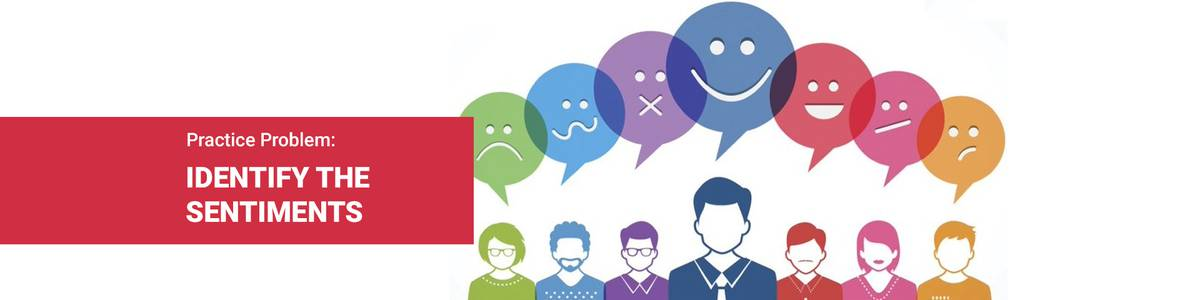

# Identify The Statments
### About
Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

link: [DataHack](https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/#About)

### Rules
* One person cannot participate with more than one user accounts.
* This is proprietary dataset, you can only use for this hackathon (Analytics Vidhya Datahack Platform) not for any other reuse
* You are free to use any tool and machine you have rightful access to.
* You can use any programming language or statistical software.
* You are free to use solution checker as many times as you want.

### Import Necessary Libraries

In [1]:
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from string import digits
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Using `sklean`

In [2]:
train_df = pd.read_csv('D:/Machine Data/DataHack/Identify the Sentiments/train_2kmZucJ.csv')
test_df = pd.read_csv('D:/Machine Data/DataHack/Identify the Sentiments/test_oJQbWVk.csv')

In [3]:
df = pd.concat([train_df, test_df])

In [4]:
train_df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [5]:
test_df

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


### Exploratory Data Analysis (EDA)

In [6]:
train_df.shape

(7920, 3)

In [7]:
train_df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


we can see that there is no null values here

In [9]:
train_df.dtypes

id        int64
label     int64
tweet    object
dtype: object

our attention will be on `tweet` column

In [10]:
train_df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

we have `5894` with `0` and `2026` with `1`

In [11]:
# train_df = train_df.drop(columns=['id'])

### Preprocessing

In [12]:
df['tweet'] = df['tweet'].astype('string')

In [13]:
df.sample(10)

,id,label,tweet
5490,5491,0.0,#treat #myself #ps4 #sony #fifa14 #excited #co...
851,8772,NaN,#Apple Names Jony Ive 'Chief Design Officer' h...
4118,4119,1.0,My phone is dead can't find a charger so I hav...
4129,4130,1.0,Not being able to update Twitter because your ...
1235,1236,0.0,#metal #childhood #cute #home #\m/ #beautiful ...
7258,7259,0.0,Just added Kids Hoodie to our collection of pr...
658,659,0.0,Check out my new baby!!!! #instagram #mextagra...
1941,1942,0.0,@avikalchhetri @mujumdar_aditya @jayesh_19 I b...
4460,4461,0.0,Follow @capetownsup on Instagram http://mf.tt/...
6038,6039,0.0,"Leave me alone"" #Parrot #Parakeet #Adorable #B..."


#### remove links from comments

In [14]:
df['tweet'] = df['tweet'].apply(lambda x : re.sub(r'http\S+', '', x))

#### removing punctuation

In [15]:
# removing special chars
exclude = set(string.punctuation)
df['tweet'] = df['tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

#### remove numbers from comments

In [16]:
df['tweet'] = df['tweet'].apply(lambda x : ''.join([i for i in x if not i.isdigit()]))

#### removing `#` and `,` from comments

In [17]:
df['tweet'] = df['tweet'].apply(lambda x : ''.join([i for i in x if not i == '#']))
df['tweet'] = df['tweet'].apply(lambda x : x.replace(',',''))

#### lower case

In [18]:
df['tweet'] = df['tweet'].apply(lambda x : x.lower())

#### removing stop words in english

In [19]:
stop_words = set(stopwords.words('english'))
df['tweet'] = df['tweet'].apply(lambda x : [w for w in word_tokenize(x) if not w.lower() in stop_words])

In [20]:
df['tweet'] = df['tweet'].astype('string')
df.sample(10)

,id,label,tweet
6596,6597,0.0,"['textgram', 'funny', 'followme', 'think', 'te..."
2856,2857,0.0,"['wwdc', 'less', 'hours', 'cant', 'wait', 'ios..."
5526,5527,1.0,"['lady', 'bidding', 'cos', 'want', 'burn']"
2938,2939,0.0,"['leigh', 'bought', 'samsung', 'tablets', 'yes..."
2321,2322,0.0,"['maybe', 'good', 'occasion', 'remark', 'im', ..."
6664,6665,0.0,"['spending', 'quality', 'time', 'itunesi', 'ca..."
773,774,1.0,"['people', 'thanks', 'holding', 'door', 'oh', ..."
2327,2328,0.0,"['girl', 'brazil', 'life', 'photo', 'face', 'h..."
1400,1401,0.0,"['really', 'want', 'ipad', 'sole', 'reason', '..."
7399,7400,0.0,"['owns', 'facebook', 'chart', 'ff', 'friends',..."


### Splitting The Data and Tekonizing Our Model

In [21]:
X = df['tweet'][:len(train_df)]
y = df['label'][:len(train_df)]

In [22]:
oversample = RandomOverSampler(sampling_strategy='minority')

##### Oversampling the `0` class since the classes are imbalanced

In [23]:
X_over, y_over = oversample.fit_resample(np.array(X).reshape(-1,1), np.array(y).reshape(-1,1))

X_over = X_over.reshape(X_over.shape[0],)
y_over = y_over.reshape(y_over.shape[0],)

In [24]:
pd.DataFrame(y_over).value_counts()

0.0    5894
1.0    5894
dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, test_size=0.2, shuffle=y)

In [26]:
vectorizer = TfidfVectorizer()

##### Fitting the vectorizer with all the data

In [27]:
vectorizer.fit_transform(df['tweet'])

<9873x20246 sparse matrix of type '<class 'numpy.float64'>'
	with 107316 stored elements in Compressed Sparse Row format>

In [28]:
train_features = vectorizer.transform(X_train)
test_features = vectorizer.transform(X_test)

`vocabulary_` returns the indexing of each unique word in all the corpus

In [29]:
vectorizer.vocabulary_

{'fingerprint': 5623,
 'pregnancy': 14053,
 'test': 17672,
 'android': 566,
 'apps': 893,
 'beautiful': 1569,
 'cute': 3835,
 'health': 7317,
 'igers': 7906,
 'iphoneonly': 8638,
 'iphonesia': 8666,
 'iphone': 8579,
 'finally': 5598,
 'transparant': 18221,
 'silicon': 16050,
 'case': 2734,
 'thanks': 17716,
 'uncle': 18640,
 'yay': 19910,
 'sony': 16472,
 'xperia': 19840,
 'sonyexperias': 16492,
 'love': 10166,
 'would': 19754,
 'go': 6649,
 'talk': 17424,
 'makememories': 10402,
 'unplug': 18712,
 'relax': 14786,
 'smartphone': 16262,
 'wifi': 19522,
 'connect': 3443,
 'im': 8027,
 'wired': 19580,
 'know': 9408,
 'george': 6434,
 'made': 10328,
 'way': 19270,
 'daventry': 3976,
 'home': 7553,
 'amazing': 479,
 'service': 15759,
 'apple': 750,
 'wont': 19644,
 'even': 5149,
 'question': 14433,
 'unless': 18698,
 'pay': 12728,
 'stupid': 17040,
 'support': 17220,
 'software': 16404,
 'update': 18735,
 'fucked': 6111,
 'phone': 12897,
 'big': 1794,
 'time': 17981,
 'iphones': 8661,
 'hap

In [30]:
len(vectorizer.vocabulary_)

20246

there are `20246` unique words in all our documents

#### Now we will build our model, we will use LogisticRegression as our classification algorithm.
* Features: They are the words represented in the `TF-IDF` format and we will use `toarray()` method to get them
* Target: it's our `label` column, it's encoded so no need to do any further processing

In [31]:
train_features = train_features.toarray()
test_features = test_features.toarray()

In [32]:
parameters = {
    'solver' : ['liblinear', ''],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.01, 0.1, 1, 10, 100, 1000]
}

lr_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)

In [33]:
lr_grid.fit(train_features, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', '']})

In [34]:
best = lr_grid.best_estimator_
best

LogisticRegression(C=10, solver='liblinear')

In [35]:
y_predicted = best.predict(test_features)

#### Plotting our results

In [36]:
cm = confusion_matrix(y_test, y_predicted)

<AxesSubplot:>

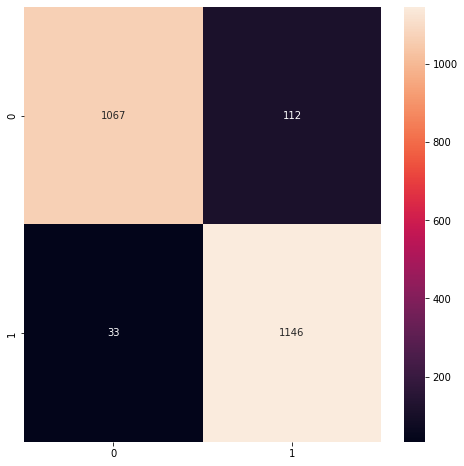

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

In [38]:
accuracy_score(y_test, y_predicted)

0.9385072094995759

# Inferencing our results

Here we are going to train our model in all our given data with the best estimator we found and predicting the test records

In [39]:
lr = LogisticRegression(C=10, solver='liblinear')
lr.fit(vectorizer.transform(X_over).toarray(), y_over)

LogisticRegression(C=10, solver='liblinear')

In [40]:
predicted = lr.predict(vectorizer.transform(df[-len(test_df):]['tweet']).toarray())

In [41]:
final = pd.DataFrame(df[-len(test_df):]['id'])

In [42]:
final['label'] = predicted

In [43]:
final

,id,label
0,7921,1.0
1,7922,1.0
2,7923,1.0
3,7924,1.0
4,7925,1.0
...,...,...
1948,9869,0.0
1949,9870,0.0
1950,9871,1.0
1951,9872,1.0


In [44]:
final.to_csv('D:/Machine Data/DataHack/Identify the Sentiments/to_submit1.csv')